<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%201%20DL%202/DataAugmentationDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Augmentation with DNN Exercise

##Get standard MNIST dataset

In [33]:
# load the mnist dataset from keras
import keras
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Create, compile and fit model with original MNIST data only

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8871 - accuracy: 0.7293 - val_loss: 0.2936 - val_accuracy: 0.9158
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2982 - accuracy: 0.9171 - val_loss: 0.2657 - val_accuracy: 0.9244
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9237 - val_loss: 0.2553 - val_accuracy: 0.9282
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.9290 - val_loss: 0.2509 - val_accuracy: 0.9296
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2405 - accuracy: 0.9321 - val_loss: 0.2433 - val_accuracy: 0.9303
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2324 - accuracy: 0.9344 - val_loss: 0.2442 - val_accuracy: 0.9281
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2263 - accuracy: 0.9350 - val_loss: 0.2429 - val_accuracy:

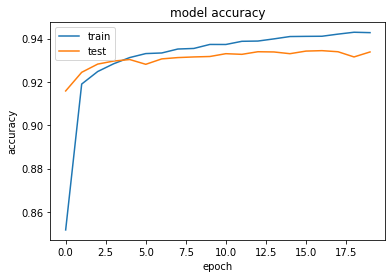

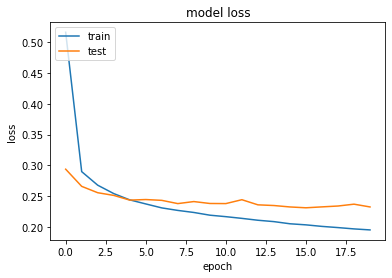

In [34]:
# Create, compile and fit the model with the original MNIST data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##Augment the MNIST dataset with rotated, zoomed, width and height shifts

In [35]:
# use the image data generator from keras to augment the data
from keras.preprocessing.image import ImageDataGenerator
# setup the generator that will augment the images
train_gen = ImageDataGenerator(rotation_range=8,   # rotate
                               width_shift_range=0.08,  # width shiift
                               shear_range=0.3,   # shear
                               height_shift_range=0.08, # height shift
                               zoom_range=0.08 )   # zoom


import numpy as np
# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1))
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# Generate aungemnted images for the test data
x_test = np.reshape(x_test, (10000,28,28,1))
test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0])

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
i = 0
for x, y in test_set:
  if i < 2:
    print(i)
    x_test_aug = np.concatenate((x_test, x))
    y_test_aug = np.concatenate((y_test, y))
    print(x_test.shape)
    print(y_test.shape)
  else:
    break
  i += 1

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)
0
(10000, 28, 28, 1)
(10000, 10)
1
(10000, 28, 28, 1)
(10000, 10)


##Create, compile and fit the model with the augmented MNIST data
(this is the same code as used above to create, compile and fit the model)

Compare this accuracy/loss with the accuracy/loss achieved with the original MNIST dataset above

Epoch 1/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.8884 - accuracy: 0.7264 - val_loss: 0.2943 - val_accuracy: 0.9177
Epoch 2/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.5236 - accuracy: 0.8431 - val_loss: 0.2728 - val_accuracy: 0.9208
Epoch 3/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4748 - accuracy: 0.8558 - val_loss: 0.2734 - val_accuracy: 0.9197
Epoch 4/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4534 - accuracy: 0.8628 - val_loss: 0.2674 - val_accuracy: 0.9224
Epoch 5/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4416 - accuracy: 0.8668 - val_loss: 0.2576 - val_accuracy: 0.9246
Epoch 6/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4350 - accuracy: 0.8680 - val_loss: 0.2510 - val_accuracy: 0.9270
Epoch 7/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4218 - accuracy: 0.8729 - val_loss: 0.2503 - val_ac

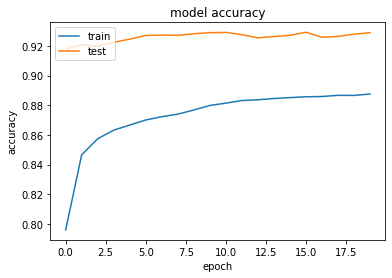

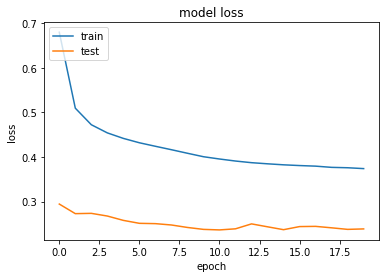

In [36]:
# same as code above to create, compile and fit the model but now using the new augmented data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The validation accuracy may be roughly the same but it was overfitting before and now the validation accuracy is much better than the training accuracy.

**However we do not want the validation accuracy to be much higher than the training accuracy as it is in the case above as this this can indicate that the validation set consists of easier examples than the training set.**

**Warning:** Sometimes the data augmentation applied to the training data makes the training task harder.  We can see in the original training (with no augmentation) as we acheive a better training accuracy of 0.94, whereas here we acheive a training accuracy of 0.88, indicating that it has become harder to train after application of the data augmentation.

## Investigate the Keras `ImageDataGenerator` and see what other augmentation you could apply